In [2]:
%%capture
!pip install cartopy
!pip install netCDF4

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
import cartopy.feature as cfeature

In [6]:
# Define the base URL and catalog URL
baseURL = 'http://www.esrl.noaa.gov'
catalogURL = '/psd/thredds/dodsC/Datasets/gpcp/precip.mon.mean.nc'

In [7]:
# Construct the full URL
dataURL = baseURL + catalogURL

In [8]:
# Open the dataset using xarray
ds = xr.open_dataset(dataURL)

In [9]:
# Select the variable you want to plot, e.g., precipitation
precip = ds['precip']

In [10]:
# Select the most recent time slice for plotting
recent_precip = precip.isel(time=-1)

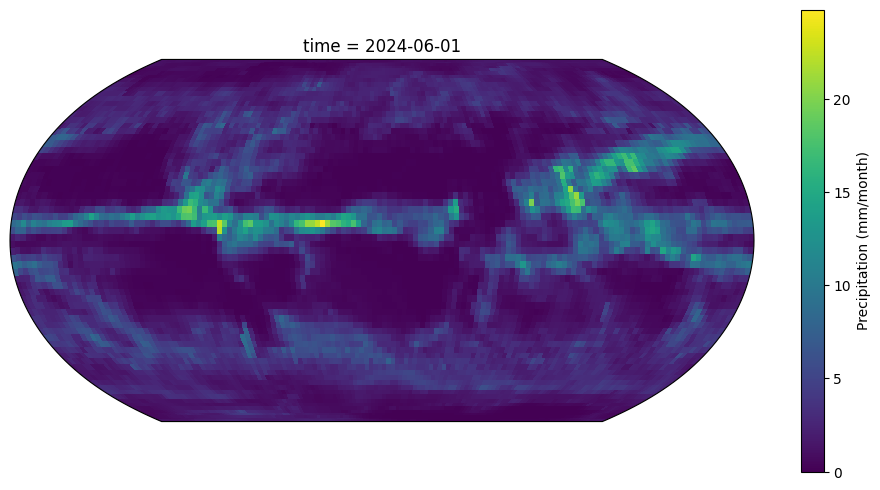

In [11]:
# Plot the data using cartopy for geographic visualization with EqualEarth projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.EqualEarth()})
recent_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Precipitation (mm/month)'})


In [12]:
# Add geographic features for context
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

Text(0.5, 1.0, 'Global Precipitation Climatology on June')

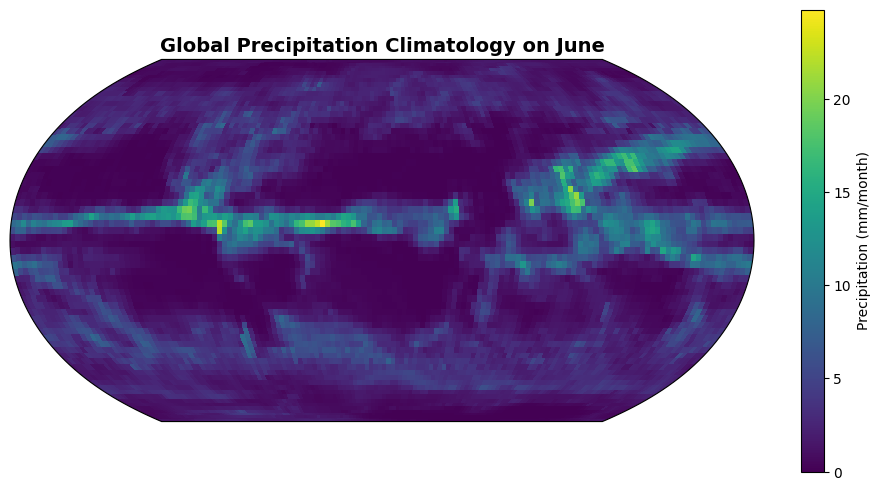

In [15]:
# Plot the data using cartopy for geographic visualization with EqualEarth projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.EqualEarth()})
recent_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Precipitation (mm/month)'})
# Set the title
plt.title('Global Precipitation Climatology on June', fontsize=14, weight='bold')

# Add annotation for author and date in the bottom right
author_text = f'Author: Lalit BC \nData: FIRMS (NASA) \nDate: {datetime.date.today().strftime("%Y-%m-%d")}'
plt.annotate(author_text, xy=(1, 0), xycoords='axes fraction', fontsize=7, ha='right', va='bottom')

# Save the figure with high resolution and transparency as PNG
plt.savefig('precip_plot_equal_earth.png', dpi=300, bbox_inches='tight', transparent=True)


# Display the plot
plt.show()